This dataset describes 5-star rating and free-text tagging activity from [MovieLens](http://movielens.org), a movie recommendation service. It contains 100836 ratings and 3683 tag applications across 9742 movies. These data were created by 610 users between March 29, 1996 and September 24, 2018. This dataset was generated on September 26, 2018.

Users were selected at random for inclusion. All selected users had rated at least 20 movies. No demographic information is included. Each user is represented by an id, and no other information is provided.

The data are contained in the files 'links.csv', 'movies.csv', 'ratings.csv' and 'tags.csv'. More details about the contents and use of all these files follows:

- User Ids: Unique and anonymized.
- Movies Ids: Only movies with at least one rating. 

In [1]:
pip install wordcloud

In [2]:
# Let's include general porpuses libraries 

import pandas as pd
import numpy as np                     # For mathematical calculations
import seaborn as sns                  # For data visualization
import matplotlib.pyplot as plt        # For plotting graphs
from datetime import datetime
from datetime import timedelta
from wordcloud import WordCloud

%matplotlib inline

Let's check one by one all the data we have 

In [3]:
dfratings = pd.read_csv('ratings.csv')
dfratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


Ratings are made in a 5-star scale, with half-star increments
Timestamp data is the time when the movie was rated (Timestamps represent seconds since midnight Coordinated Universal Time (UTC) of January 1, 1970)

In [4]:
dfratings.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [5]:
dfratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


Let's translate the timestamp in a datetime type in python

In [6]:
dfratings['timestamp'].values

array([ 964982703,  964981247,  964982224, ..., 1494273047, 1493846352,
       1493846415], dtype=int64)

In [7]:
dates = []

for ts in dfratings['timestamp'].values:
    dates.append((datetime.fromtimestamp((ts))))
    
dfratings['dates'] = dates

In [8]:
dfratings=dfratings.drop('timestamp', axis=1)
dfratings.head()

,userId,movieId,rating,dates
0,1,1,4.0,2000-07-30 20:45:03
1,1,3,4.0,2000-07-30 20:20:47
2,1,6,4.0,2000-07-30 20:37:04
3,1,47,5.0,2000-07-30 21:03:35
4,1,50,5.0,2000-07-30 20:48:51


In [9]:
dftags = pd.read_csv('tags.csv')
dftags.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


This table has free-text taggind done by users. Also claissified by userId and movieId. The meaning, value, and purpose of a particular tag is determined by each user.

In [10]:
dftags = dftags.drop('timestamp', axis=1)

In [11]:
dftags.isnull().sum()

userId     0
movieId    0
tag        0
dtype: int64

In [12]:
dftags.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3683 entries, 0 to 3682
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   userId   3683 non-null   int64 
 1   movieId  3683 non-null   int64 
 2   tag      3683 non-null   object
dtypes: int64(2), object(1)
memory usage: 86.4+ KB


In [13]:
dfmovies = pd.read_csv('movies.csv')
dfmovies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


Title includes the title of the movie and the year of release. They are also classified in different Genres:

In [14]:
dfmovies['genres'].value_counts()

Drama                                                     1053
Comedy                                                     946
Comedy|Drama                                               435
Comedy|Romance                                             363
Drama|Romance                                              349
                                                          ... 
Adventure|Comedy|Musical|Sci-Fi                              1
Adventure|Fantasy|Thriller                                   1
Action|Fantasy|Sci-Fi|IMAX                                   1
Action|Adventure|Drama|Fantasy|Romance|Sci-Fi|Thriller       1
Action|Romance|Western                                       1
Name: genres, Length: 951, dtype: int64

They belong to any of the following categories or all the possible combination between them
* Action
* Adventure
* Animation
* Children's
* Comedy
* Crime
* Documentary
* Drama
* Fantasy
* Film-Noir
* Horror
* Musical
* Mystery
* Romance
* Sci-Fi
* Thriller
* War
* Western

In [15]:
dfmovies.isnull().sum()

movieId    0
title      0
genres     0
dtype: int64

In [16]:
dfmovies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


let's separate title and year of release in two different columns:

In [17]:
#find a year stored between parentheses
dff=dfmovies
dfmovies['year'] = dfmovies.title.str.extract('(\(\d\d\d\d\))',expand=False)
#Removing the parentheses:
dfmovies['year'] = dfmovies.year.str.extract('(\d\d\d\d)',expand=False)
#Removing the years from the 'title' column:
dfmovies['title'] = dfmovies.title.str.replace('(\(\d\d\d\d\))', '')
dfmovies

<ipython-input-17-58726418d341>:7: FutureWarning: The default value of regex will change from True to False in a future version.
  dfmovies['title'] = dfmovies.title.str.replace('(\(\d\d\d\d\))', '')


,movieId,title,genres,year
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji,Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men,Comedy|Romance,1995
3,4,Waiting to Exhale,Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II,Comedy,1995
...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic,Action|Animation|Comedy|Fantasy,2017
9738,193583,No Game No Life: Zero,Animation|Comedy|Fantasy,2017
9739,193585,Flint,Drama,2017
9740,193587,Bungo Stray Dogs: Dead Apple,Action|Animation,2018


We do have some missing values related to the release date of some movies. Those will be manually imputed.

In [18]:
dfmovies['year'].isnull().sum()

13

In [19]:
dfmovies['year'][6059] = 1994
dfmovies['year'][9031] = 2018
dfmovies['year'][9091] = 2015
dfmovies['year'][9138] = 1980
dfmovies['year'][9179] = 2016
dfmovies['year'][9259] = 2016
dfmovies['year'][9367] = 2016
dfmovies['year'][9448] = 2016
dfmovies['year'][9514] = 2015
dfmovies['year'][9515] = 2017
dfmovies['year'][9518] = 2006
dfmovies['year'][9525] = 2017
dfmovies['year'][9611] = 2011

<ipython-input-19-e31fac1c5e3a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfmovies['year'][6059] = 1994
<ipython-input-19-e31fac1c5e3a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfmovies['year'][9031] = 2018
<ipython-input-19-e31fac1c5e3a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfmovies['year'][9091] = 2015
<ipython-input-19-e31fac1c5e3a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sli

In [20]:
dfmovies['year'].isnull().sum()

0

In [21]:
dfmovies['year'] = dfmovies['year'].astype(int)

In [22]:
dfmovies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
 3   year     9742 non-null   int32 
dtypes: int32(1), int64(1), object(2)
memory usage: 266.5+ KB


We separate the genres in individual columns, if a movie belongs to a speficic genre, the column is encoded with 1, otherwise 0

In [23]:
dfmovies['Action']=dfmovies['genres'].apply(lambda x: 1 if "Action" in x else 0)
dfmovies['Adventure']=dfmovies['genres'].apply(lambda x: 1 if "Adventure" in x else 0)
dfmovies['Animation']=dfmovies['genres'].apply(lambda x: 1 if "Animation" in x else 0)
dfmovies['Children']=dfmovies['genres'].apply(lambda x: 1 if "Children" in x else 0)
dfmovies['Comedy']=dfmovies['genres'].apply(lambda x: 1 if "Comedy" in x else 0)
dfmovies['Crime']=dfmovies['genres'].apply(lambda x: 1 if "Crime" in x else 0)
dfmovies['Documentary']=dfmovies['genres'].apply(lambda x: 1 if "Documentary" in x else 0)
dfmovies['Drama']=dfmovies['genres'].apply(lambda x: 1 if "Drama" in x else 0)
dfmovies['Fantasy']=dfmovies['genres'].apply(lambda x: 1 if "Fantasy" in x else 0)
dfmovies['Film-Noir']=dfmovies['genres'].apply(lambda x: 1 if "Film-Noir" in x else 0)
dfmovies['Horror']=dfmovies['genres'].apply(lambda x: 1 if "Horror" in x else 0)
dfmovies['Musical']=dfmovies['genres'].apply(lambda x: 1 if "Musical" in x else 0)
dfmovies['Mystery']=dfmovies['genres'].apply(lambda x: 1 if "Mystery" in x else 0)
dfmovies['Romance']=dfmovies['genres'].apply(lambda x: 1 if "Romance" in x else 0)
dfmovies['Sci-Fi']=dfmovies['genres'].apply(lambda x: 1 if "Sci-Fi" in x else 0)
dfmovies['Thriller']=dfmovies['genres'].apply(lambda x: 1 if "Thriller" in x else 0)
dfmovies['War']=dfmovies['genres'].apply(lambda x: 1 if "War" in x else 0)
dfmovies['Western']=dfmovies['genres'].apply(lambda x: 1 if "Western" in x else 0)

In [24]:
dfmovies=dfmovies.drop('genres', axis=1)
dfmovies.head()

,movieId,title,year,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story,1995,0,1,1,1,1,0,0,...,1,0,0,0,0,0,0,0,0,0
1,2,Jumanji,1995,0,1,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men,1995,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale,1995,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II,1995,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
dflinks = pd.read_csv('links.csv')
dflinks.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


imdbId is the identifier of the movie in imdbId. For possible connection with http://www.imdb.com, https://www.imdb.com/title/tt0 + imdbId

https://www.themoviedb.org/movie/862-toy-story for tmdbId

In [26]:
dflinks.isnull().sum()

movieId    0
imdbId     0
tmdbId     8
dtype: int64

In [27]:
dflinks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  9742 non-null   int64  
 1   imdbId   9742 non-null   int64  
 2   tmdbId   9734 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 228.5 KB


Let's get a dictionary with the most commom tags in each movie

In [28]:
dftags['tag']=dftags['tag'].str.lower() ## let's pull all of them in lowercase letters

In [29]:
pd.DataFrame(dftags['tag'].value_counts())

,tag
in netflix queue,131
atmospheric,41
thought-provoking,24
surreal,24
superhero,24
...,...
joker,1
dc,1
film-noir,1
imaginative,1


Let's just keep tha values with a frequency bigger than 10

In [30]:
mask = pd.DataFrame((dftags['tag'].value_counts())> 10)
to_keep=mask.index[mask['tag'] == True].tolist() ## This are the tags to keep for our model
to_keep

['in netflix queue',
 'atmospheric',
 'thought-provoking',
 'surreal',
 'superhero',
 'funny',
 'disney',
 'sci-fi',
 'quirky',
 'religion',
 'psychology',
 'dark comedy',
 'suspense',
 'visually appealing',
 'twist ending',
 'crime',
 'politics',
 'comedy',
 'music',
 'action',
 'high school',
 'mental illness',
 'time travel',
 'dark',
 'mindfuck',
 'aliens',
 'dreamlike',
 'space',
 'black comedy',
 'shakespeare',
 'stephen king',
 'emotional',
 'holocaust',
 'journalism',
 'disturbing',
 'mafia',
 'heist',
 'court',
 'classic',
 'christmas',
 'satire',
 'anime',
 'psychological',
 'adolescence',
 'comic book',
 'ghosts',
 'adultery',
 'bittersweet',
 'imdb top 250',
 'animation',
 'boxing']

In [31]:
# Lets use a get dummies to obtain a Onehotencoder result, then apply to_keep for only keeping the columns with a
# frequency bigger than 10 
dict_tags=pd.get_dummies(dftags['tag'])
dict_tags=dict_tags[to_keep]

In [32]:
# Lets add this to the original tags dataframe
dftags=dftags.join(dict_tags)

In [33]:
dftags.head()

,userId,movieId,tag,in netflix queue,atmospheric,thought-provoking,surreal,superhero,funny,disney,...,anime,psychological,adolescence,comic book,ghosts,adultery,bittersweet,imdb top 250,animation,boxing
0,2,60756,funny,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,60756,highly quotable,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,60756,will ferrell,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2,89774,boxing story,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,89774,mma,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
## Then we could also do a group by movieId, so we have all the tags for a specific movie
tagsbymovie = dftags.drop('userId', axis=1).groupby('movieId').agg(lambda x: sum(x)).reset_index()
tagsbymovie.head()

,movieId,in netflix queue,atmospheric,thought-provoking,surreal,superhero,funny,disney,sci-fi,quirky,...,anime,psychological,adolescence,comic book,ghosts,adultery,bittersweet,imdb top 250,animation,boxing
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
dfmovies = dfmovies.merge(tagsbymovie, how='left').fillna(0.0)
dfmovies.head()

,movieId,title,year,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,...,anime,psychological,adolescence,comic book,ghosts,adultery,bittersweet,imdb top 250,animation,boxing
0,1,Toy Story,1995,0,1,1,1,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,Jumanji,1995,0,1,0,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,Grumpier Old Men,1995,0,0,0,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,Waiting to Exhale,1995,0,0,0,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,Father of the Bride Part II,1995,0,0,0,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Lets merge the ranking dt with our final movies/tags df:

In [36]:
df = dfratings.set_index('movieId').join(dfmovies.set_index('movieId')).reset_index()

In [37]:
df.head()

,movieId,userId,rating,dates,title,year,Action,Adventure,Animation,Children,...,anime,psychological,adolescence,comic book,ghosts,adultery,bittersweet,imdb top 250,animation,boxing
0,1,1,4.0,2000-07-30 20:45:03,Toy Story,1995,0,1,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,5,4.0,1996-11-08 07:36:02,Toy Story,1995,0,1,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,7,4.5,2005-01-25 07:52:26,Toy Story,1995,0,1,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,15,2.5,2017-11-13 13:59:30,Toy Story,1995,0,1,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,17,4.5,2011-05-18 07:28:03,Toy Story,1995,0,1,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Non personalized recommendations 
- Optionel (Movies seen together) 
- Top 10 Movies (Semaine, mois, )
- Top 10 Movies per category (Semaine, mois, )
- Top 10 most popular (Semaine, mois, )
- Top 10 categories (Semaine, mois, )
- Top 10 tags (Semaine, mois, )

### Dataframe manipulation functions

First, let's define a function that will consider only the data in a specific
period:

In [38]:
def dateperiod(df, days_past, end_date=datetime(2018, 9, 24)):    
    mask = ((df['dates'] > (end_date - timedelta(days=days_past))) & (df['dates'] <= end_date ))
    return df.loc[mask]

In [39]:
#Test
dateperiod(df, days_past=1)

,movieId,userId,rating,dates,title,year,Action,Adventure,Animation,Children,...,anime,psychological,adolescence,comic book,ghosts,adultery,bittersweet,imdb top 250,animation,boxing
100779,187031,514,2.5,2018-09-23 05:55:27,Jurassic World: Fallen Kingdom,2018,1,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100800,187595,514,3.0,2018-09-23 05:55:46,Solo: A Star Wars Story,2018,1,1,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Now let's create different function that will manipulate the main dataframe to get calculated values needed to the plot.
This first function return the top N most popular movies by counting the number of rating

In [40]:
def top_popular(df, top, days_past, categories_filter=0):
    df_timestamp = dateperiod(df, days_past=days_past)
    df_filtred = df_timestamp
    if categories_filter!=0:
        for i in categories_filter:
            df_filtred = df_filtred[df_filtred[i]==1]
    
    dfTop10Popular = df_filtred.groupby(['movieId','title'])['rating'].agg('count').reset_index(name='nb_ratings').sort_values(by='nb_ratings', ascending=False).head(top)

    
    return dfTop10Popular

In [41]:
#Test
categories_filter=['Horror']
top_popular(df, 5, 100, categories_filter=categories_filter)

,movieId,title,nb_ratings
3,593,"Silence of the Lambs, The",7
52,2762,"Sixth Sense, The",6
125,168250,Get Out,4
10,1258,"Shining, The",4
7,1214,Alien,3


Let's create a function that give the top N movies by rating and by category in the choosen duration 

In [42]:
def top_rating(df, top, days_past, categories_filter=0):
    df_timestamp = dateperiod(df, days_past=days_past)
    df_filtred = df_timestamp
    if categories_filter!=0:
        for i in categories_filter:
            df_filtred = df_filtred[df_filtred[i]==1]
            
    df_rating_mean = df_filtred.groupby(['movieId','title'])['rating'].agg('mean').reset_index(name='rating_mean')
    df_rating_count = df_filtred.groupby(['movieId',])['rating'].agg('count').reset_index(name='rating_count')
    dfTop10movies = df_rating_mean.merge(df_rating_count, on='movieId', how='left')
    filter_factor = round(max(dfTop10movies['rating_count'])/3)
    dfTop10movies = dfTop10movies[dfTop10movies['rating_count']>filter_factor].sort_values(by = 'rating_mean',ascending = False).head(top)

    return dfTop10movies

In [43]:
#Test
categories_filter=['comedy']
top_rating(df, 10, 365, categories_filter=categories_filter)

,movieId,title,rating_mean,rating_count
0,296,Pulp Fiction,4.214286,14
6,8641,Anchorman: The Legend of Ron Burgundy,3.750000,6
14,179401,Jumanji: Welcome to the Jungle,3.666667,6
1,1732,"Big Lebowski, The",3.555556,9
5,7361,Eternal Sunshine of the Spotless Mind,3.500000,8
10,69122,"Hangover, The",3.444444,9
2,3948,Meet the Parents,2.950000,10


Let's also check the top genres in a specific time frame:

In [44]:
def top_genre(df, top, days_past):
    df_timestamp = dateperiod(df, days_past=days_past) 
    categories = df_timestamp.columns[6:24]
    sum_categories = dict()
    for i in categories:
        sum_categories[i] = df_timestamp[i].sum()
    
    sorted_categories = sorted(sum_categories.items(), key=lambda x: x[1], reverse=True)
    sorted_categoriesdf = pd.DataFrame(sorted_categories).head(top)
    sorted_categoriesdf.columns = ['Genre', 'count']
    return sorted_categoriesdf

In [45]:
#Test
top_genre(df, 5, 100)

,Genre,count
0,Action,837
1,Drama,762
2,Adventure,722
3,Comedy,572
4,Sci-Fi,565


Let's create a function that give the top N most frequent tags in the choosen duration 

In [46]:
def top_tags(df, top, days_past):
    df_timestamp = dateperiod(df, days_past=days_past) 
    tags = df_timestamp.columns[24:]
    sum_tags = dict()
    for i in tags:
        sum_tags[i] = df_timestamp[i].sum()
    
    sorted_tags= sorted(sum_tags.items(), key=lambda x: x[1], reverse=True)
    sorted_tagsdf = pd.DataFrame(sorted_tags).head(top)
    sorted_tagsdf.columns = ['Tag', 'count']
    return sorted_tagsdf

In [47]:
#Test
top_tags(df, 10, 100)

,Tag,count
0,thought-provoking,98.0
1,sci-fi,92.0
2,atmospheric,78.0
3,visually appealing,76.0
4,superhero,71.0
5,twist ending,62.0
6,action,61.0
7,psychology,56.0
8,suspense,53.0
9,psychological,53.0


## OUTPUT
Next, we take these outputs and we do barplots to show the rankings:

Let's create a function that display a barchat

In [48]:
def plot_barchart(df, x, y):
    ax =sns.barplot(x=x, y=y, data=df)

In [49]:
def plot_wordcloud(df):
    df = df.set_index(df.columns[0])
    wc = WordCloud().generate_from_frequencies(df['count'])

    # Partie plot
    plt.figure()
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.show()

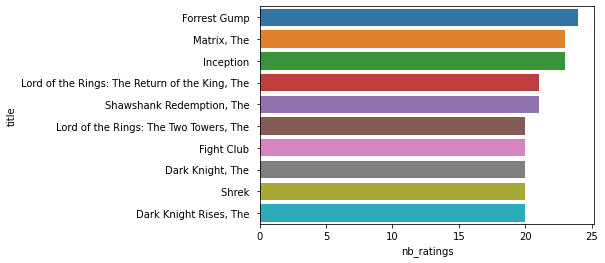

In [50]:
#Display the most popular movies
plot_barchart(top_popular(df=df, top=10, days_past=365), 'nb_ratings', 'title')

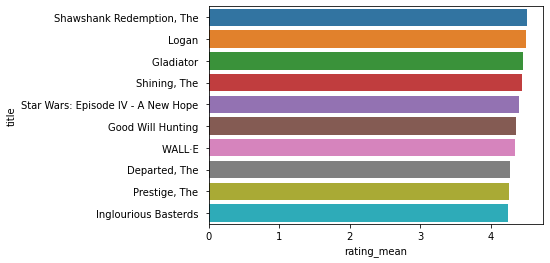

In [51]:
#Display the most rated movies
plot_barchart(top_rating(df=df, top=10, days_past=365), 'rating_mean', 'title')

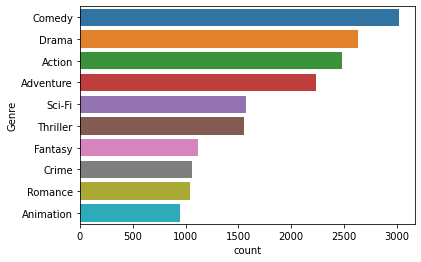

In [52]:
#Display the most popular category of movies
plot_barchart(top_genre(df, 10, 365), 'count', 'Genre')

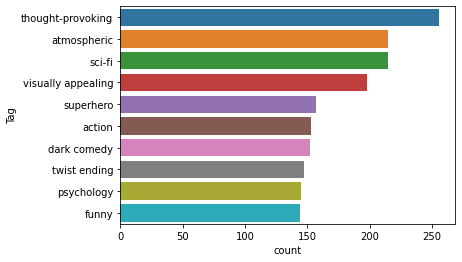

In [53]:
#Display the most popular tags of movies
plot_barchart(top_tags(df, 10, 365), 'count', 'Tag')

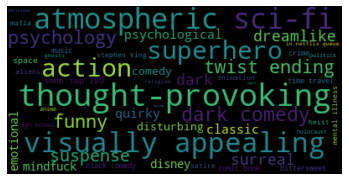

In [54]:
#Display the most popular tags of movies in a different way
plot_wordcloud(top_tags(df, 100, 365))

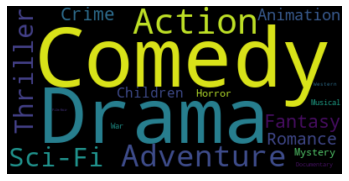

In [55]:
#Display the most popular tags of movies in a different way
plot_wordcloud(top_genre(df, 100, 365))

## MODEL TUNING

### Création d'un modèle Matrice Factorization


In [56]:
user_ratings_df = df[['movieId','userId','rating']]
user_ratings_df.head()

,movieId,userId,rating
0,1,1,4.0
1,1,5,4.0
2,1,7,4.5
3,1,15,2.5
4,1,17,4.5


In [57]:
user_ratings_pivot = user_ratings_df.pivot(index='userId',columns='movieId',values='rating')
print(user_ratings_pivot.head(5))

movieId  1       2       3       4       5       6       7       8       \
userId                                                                    
1           4.0     NaN     4.0     NaN     NaN     4.0     NaN     NaN   
2           NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
3           NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
4           NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
5           4.0     NaN     NaN     NaN     NaN     NaN     NaN     NaN   

movieId  9       10      ...  193565  193567  193571  193573  193579  193581  \
userId                   ...                                                   
1           NaN     NaN  ...     NaN     NaN     NaN     NaN     NaN     NaN   
2           NaN     NaN  ...     NaN     NaN     NaN     NaN     NaN     NaN   
3           NaN     NaN  ...     NaN     NaN     NaN     NaN     NaN     NaN   
4           NaN     NaN  ...     NaN     NaN     NaN     NaN     NaN     N

In [58]:
number_of_empty = user_ratings_pivot.isnull().values.sum()
print("number_of_empty:",number_of_empty)
total_number = user_ratings_pivot.size
print("total_number:",total_number)
sparsity = number_of_empty/total_number
print("sparsity:",sparsity)

number_of_empty: 5830804
total_number: 5931640
sparsity: 0.9830003169443864


In [59]:
avg_ratings = user_ratings_pivot.mean(axis=1)
avg_ratings

userId
1      4.366379
2      3.948276
3      2.435897
4      3.555556
5      3.636364
         ...   
606    3.657399
607    3.786096
608    3.134176
609    3.270270
610    3.688556
Length: 610, dtype: float64

In [60]:
user_ratings_pivot_centered = user_ratings_pivot.sub(avg_ratings, axis=0)
user_ratings_pivot_centered

movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,-0.366379,NaN,-0.366379,NaN,NaN,-0.366379,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,0.363636,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,-1.157399,NaN,NaN,NaN,NaN,NaN,-1.157399,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
607,0.213904,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
608,-0.634176,-1.134176,-1.134176,NaN,NaN,NaN,NaN,NaN,NaN,0.865824,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [61]:
user_ratings_pivot_centered.fillna(0, inplace=True)
print(user_ratings_pivot_centered)

movieId    1         2         3       4       5         6         7       \
userId                                                                      
1       -0.366379  0.000000 -0.366379     0.0     0.0 -0.366379  0.000000   
2        0.000000  0.000000  0.000000     0.0     0.0  0.000000  0.000000   
3        0.000000  0.000000  0.000000     0.0     0.0  0.000000  0.000000   
4        0.000000  0.000000  0.000000     0.0     0.0  0.000000  0.000000   
5        0.363636  0.000000  0.000000     0.0     0.0  0.000000  0.000000   
...           ...       ...       ...     ...     ...       ...       ...   
606     -1.157399  0.000000  0.000000     0.0     0.0  0.000000 -1.157399   
607      0.213904  0.000000  0.000000     0.0     0.0  0.000000  0.000000   
608     -0.634176 -1.134176 -1.134176     0.0     0.0  0.000000  0.000000   
609     -0.270270  0.000000  0.000000     0.0     0.0  0.000000  0.000000   
610      1.311444  0.000000  0.000000     0.0     0.0  1.311444  0.000000   

In [62]:
#building the sub-matrices needed for the matrix factorization calculation 
from scipy.sparse.linalg import svds
U, sigma, Vt = svds(user_ratings_pivot_centered)
print(U.shape)
print(Vt.shape)
print(sigma)
#Diagonalization
sigma = np.diag(sigma)
print(sigma)

(610, 6)
(6, 9724)
[36.54895519 37.95619249 39.37050585 41.77917206 43.6224036  76.20046537]
[[36.54895519  0.          0.          0.          0.          0.        ]
 [ 0.         37.95619249  0.          0.          0.          0.        ]
 [ 0.          0.         39.37050585  0.          0.          0.        ]
 [ 0.          0.          0.         41.77917206  0.          0.        ]
 [ 0.          0.          0.          0.         43.6224036   0.        ]
 [ 0.          0.          0.          0.          0.         76.20046537]]


In [63]:
#building of the ratings prediction matrix  ( matrix = U * sigma * Vt)
recalculated_ratings = np.dot(np.dot(U, sigma), Vt)
print(recalculated_ratings,recalculated_ratings.shape)

[[ 9.59343518e-02 -1.71945495e-02  2.27523739e-02 ... -1.34624568e-05
  -1.34624568e-05  5.89547842e-04]
 [-4.08968238e-04  4.54110162e-04 -4.93120168e-03 ... -8.36576329e-06
  -8.36576329e-06 -5.95822929e-06]
 [-2.95922628e-02  3.72046555e-03 -1.51491416e-02 ... -3.59273284e-05
  -3.59273284e-05 -1.52040897e-04]
 ...
 [ 3.12364266e-01 -2.95290977e-01 -4.52094620e-01 ... -3.59424467e-05
  -3.59424467e-05 -2.52639026e-05]
 [ 1.58856307e-02 -4.81933236e-03  1.37231199e-03 ...  1.98083300e-06
   1.98083300e-06  1.73775968e-04]
 [ 5.97439189e-01 -1.19549102e-01 -1.92823569e-01 ... -9.41640085e-04
  -9.41640085e-04  4.68139853e-03]] (610, 9724)


In [64]:
#then we re-add the mean matrix to get real predicted values
recalculated_ratings = recalculated_ratings + avg_ratings.values.reshape(-1, 1)
print(recalculated_ratings,recalculated_ratings.shape )

[[4.46231366 4.34918476 4.38913168 ... 4.36636585 4.36636585 4.36696886]
 [3.94786689 3.94872997 3.94334466 ... 3.9482675  3.9482675  3.9482699 ]
 [2.40630517 2.4396179  2.42074829 ... 2.43586151 2.43586151 2.4357454 ]
 ...
 [3.44653996 2.83888471 2.68208107 ... 3.13413975 3.13413975 3.13415043]
 [3.2861559  3.26545094 3.27164258 ... 3.27027225 3.27027225 3.27044405]
 [4.28599526 3.56900697 3.4957325  ... 3.68761443 3.68761443 3.69323747]] (610, 9724)


In [65]:
act_ratings_df = user_ratings_pivot.copy()
act_ratings_df

movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,NaN,4.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,2.5,NaN,NaN,NaN,NaN,NaN,2.5,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
607,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
608,2.5,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [66]:
actual_values = act_ratings_df.iloc[:20, :100].values.copy()
print(actual_values)

[[4.  nan 4.  ... 4.  nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [3.5 3.  nan ... 4.5 4.  nan]
 [4.  3.  3.  ... nan nan nan]
 [nan 3.  nan ... nan nan nan]]


In [67]:
act_ratings_df.iloc[:20, :100] = np.nan
print(act_ratings_df)

movieId  1       2       3       4       5       6       7       8       \
userId                                                                    
1           NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2           NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
3           NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
4           NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
5           NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
...         ...     ...     ...     ...     ...     ...     ...     ...   
606         2.5     NaN     NaN     NaN     NaN     NaN     2.5     NaN   
607         4.0     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
608         2.5     2.0     2.0     NaN     NaN     NaN     NaN     NaN   
609         3.0     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
610         5.0     NaN     NaN     NaN     NaN     5.0     NaN     NaN   

movieId  9       10     

In [68]:
calc_pred_ratings_df = pd.DataFrame(recalculated_ratings).copy()
calc_pred_ratings_df

,0,1,2,3,4,5,6,7,8,9,...,9714,9715,9716,9717,9718,9719,9720,9721,9722,9723
0,4.462314,4.349185,4.389132,4.355828,4.304889,4.379954,4.339853,4.353081,4.371022,4.304191,...,4.366366,4.366333,4.366399,4.366399,4.366366,4.366399,4.366366,4.366366,4.366366,4.366969
1,3.947867,3.948730,3.943345,3.948975,3.954781,3.955014,3.950488,3.949590,3.946458,3.960781,...,3.948267,3.948247,3.948288,3.948288,3.948267,3.948288,3.948267,3.948267,3.948267,3.948270
2,2.406305,2.439618,2.420748,2.440964,2.468875,2.461135,2.451152,2.439374,2.424418,2.481790,...,2.435862,2.435774,2.435949,2.435949,2.435862,2.435949,2.435862,2.435862,2.435862,2.435745
3,3.616146,3.556886,3.576326,3.551370,3.500886,3.497739,3.521390,3.555289,3.562753,3.490580,...,3.555621,3.555780,3.555462,3.555462,3.555621,3.555462,3.555621,3.555621,3.555621,3.555394
4,3.653970,3.633074,3.646911,3.631662,3.620151,3.628583,3.628683,3.635113,3.640487,3.596743,...,3.636387,3.636443,3.636330,3.636330,3.636387,3.636330,3.636387,3.636387,3.636387,3.636556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
605,3.897556,3.566707,3.688992,3.599346,3.434501,3.736443,3.544275,3.646346,3.650694,3.282278,...,3.657630,3.658191,3.657068,3.657068,3.657630,3.657068,3.657630,3.657630,3.657630,3.659773
606,3.818336,3.773703,3.799590,3.778775,3.742178,3.779247,3.769289,3.778643,3.796693,3.733471,...,3.786128,3.786204,3.786051,3.786051,3.786128,3.786051,3.786128,3.786128,3.786128,3.786412
607,3.446540,2.838885,2.682081,3.117258,2.706645,3.795240,2.909024,3.114491,2.974129,3.601215,...,3.134140,3.134052,3.134227,3.134227,3.134140,3.134227,3.134140,3.134140,3.134140,3.134150
608,3.286156,3.265451,3.271643,3.267343,3.260062,3.277101,3.266075,3.268635,3.272298,3.258482,...,3.270272,3.270277,3.270267,3.270267,3.270272,3.270267,3.270272,3.270272,3.270272,3.270444


In [69]:
predicted_values = calc_pred_ratings_df.iloc[:20, :100].values.copy()
predicted_values

array([[4.46231366, 4.34918476, 4.38913168, ..., 4.50021697, 4.48179823,
        4.33227104],
       [3.94786689, 3.94872997, 3.94334466, ..., 3.94297918, 3.93917959,
        3.9544112 ],
       [2.40630517, 2.4396179 , 2.42074829, ..., 2.41580288, 2.40731046,
        2.46989418],
       ...,
       [3.99033035, 3.67243072, 3.71568789, ..., 4.02873173, 3.97168051,
        3.70323035],
       [2.9483653 , 2.49779807, 2.51496479, ..., 3.03134944, 2.92617219,
        2.69442066],
       [3.80541934, 3.56945095, 3.63822967, ..., 3.8342459 , 3.71853511,
        3.49176736]])

In [70]:
mask = ~np.isnan(actual_values)
mask

array([[ True, False,  True, ...,  True, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [ True,  True, False, ...,  True,  True, False],
       [ True,  True,  True, ..., False, False, False],
       [False,  True, False, ..., False, False, False]])

In [71]:
print(actual_values[mask])

[4.  4.  4.  5.  5.  3.  5.  4.  0.5 3.  2.  3.  2.  3.  3.  4.  4.  4.
 4.  4.  3.  4.  5.  4.  4.  5.  3.  5.  4.  4.  3.  3.  4.  3.  4.  4.
 4.  2.  2.  5.  4.  3.  4.  3.  3.  4.  4.  5.  4.  4.  3.  4.  4.  1.
 4.  4.  4.  4.  3.  3.  4.  3.  5.  3.  2.  4.  4.  4.  4.  3.  1.  4.
 3.  5.  4.  4.5 4.5 3.  4.  2.  4.  4.  3.  5.  3.  4.  5.  3.  3.  5.
 3.  4.  2.  3.  5.  4.  5.  3.  3.  1.  4.  4.  3.  5.  5.  3.  5.  2.5
 1.  3.5 3.5 4.  4.5 4.5 3.5 4.  4.5 4.5 4.  3.5 3.  4.  4.5 4.  2.5 4.
 4.5 5.  3.5 2.5 4.5 4.  4.  3.  3.  2.  2.  1.  3.  2.  2.  4.  4.  3.
 3.  1.  2.  2.  2.  2.  2.  2.  1.  2.  2.  3.  1.  4.  4.  5.  3.5]


In [72]:
print(predicted_values[mask])

[4.46231366 4.38913168 4.3799541  4.48622541 4.56942939 4.33931538
 4.41791396 4.50021697 2.43489635 3.61613526 3.52831983 3.57936674
 3.52124838 3.51278027 3.55742833 3.55665842 3.65396972 3.64321753
 3.65217623 3.65179333 3.62753199 3.6968513  3.64001053 3.64524042
 3.47798532 3.47100643 3.49693905 3.42701201 3.49685675 3.46178192
 3.48226755 3.57145581 3.57006962 3.49201372 3.4905769  3.48037608
 3.51078653 3.38897934 3.4214272  3.50093605 3.4892932  3.45920044
 3.48738116 3.46219366 3.4957506  3.52648139 3.48006125 3.47283892
 3.48338787 3.49231115 3.49589149 3.48069537 3.52023379 3.49103013
 3.46544144 3.48820087 3.49819178 3.61330224 3.42131432 3.48387164
 3.48665727 3.51425696 3.50113828 3.5140588  3.49695104 3.50158309
 3.48000608 3.51617443 3.47375457 3.49044496 3.4866689  3.55500068
 3.55968628 3.62948655 3.45236323 3.4619529  3.53242581 3.24203509
 3.55854058 3.53949984 3.56023277 3.5808519  3.65354675 3.58896759
 3.55653124 3.6339675  3.68031293 3.63735488 3.26207884 3.8008

In [73]:
from sklearn.metrics import mean_squared_error

print(mean_squared_error(actual_values[mask], predicted_values[mask], squared=False))

0.892142686961668


In [74]:
#### Try Kfold

In [75]:
import pandas as pd
from sklearn.model_selection import KFold 
from scipy.sparse.linalg import svds
from sklearn.metrics import mean_squared_error

In [76]:
user_ratings_df = df[['movieId','userId','rating']]
user_ratings_pivot = user_ratings_df.pivot(index='userId',columns='movieId',values='rating')

In [77]:
k = 15
kf = KFold(n_splits=k, random_state=None)

X = user_ratings_pivot.copy()
for train_index , test_index in kf.split(X):
    #Cut the data un train and test parts 
    X_train , X_test =X.iloc[train_index,:],X.iloc[test_index,:]
    #Get the actual values in the test part 
    actual_values = X_test.values.copy()
    
    act_ratings_df = X.copy()
    act_ratings_df.iloc[test_index,:] = np.nan
    
    avg_ratings = user_ratings_pivot.mean(axis=1)
    user_ratings_pivot_centered = user_ratings_pivot.sub(avg_ratings, axis=0)
    user_ratings_pivot_centered.fillna(0, inplace=True)

    U, sigma, Vt = svds(user_ratings_pivot_centered)
    sigma = np.diag(sigma)
    recalculated_ratings = np.dot(np.dot(U, sigma), Vt)
    #then we re-add the mean matrix to get real predicted values
    recalculated_ratings = recalculated_ratings + avg_ratings.values.reshape(-1, 1)
    
    predicted_values = pd.DataFrame(recalculated_ratings).iloc[test_index,:].values.copy()
    
    mask = ~np.isnan(actual_values)
    print("mean_squared_error",mean_squared_error(actual_values[mask], predicted_values[mask], squared=False))

mean_squared_error 0.9433586159615306
mean_squared_error 0.8487415046271094
mean_squared_error 0.8781932762194123
mean_squared_error 0.9361016790638278
mean_squared_error 0.8619259102718216
mean_squared_error 0.8254050236090218
mean_squared_error 0.8294057278842676
mean_squared_error 0.8909416027551837
mean_squared_error 0.8212201312779449
mean_squared_error 0.8724902015460185
mean_squared_error 0.6079984909484162
mean_squared_error 0.7959541908334151
mean_squared_error 0.9412242775327171
mean_squared_error 0.8943042664153485
mean_squared_error 0.7606183886671444


### Matrix_Factorization_custom_user Description
##### Input : 
a dictonary of couple movies:ratings which represent a new user
##### Output : 
the rating prediction of all  movie for the new user
##### Program :
It take the dataframe ['movieId','userId','rating'], it create a pivot table from it,then add the custom user datas.
Then the table is centred by the mean of ratings then the nan value are put to 0.
finaly we make the ratings prection matrix with the factorization methode then return a part of the matrix matching with the new user.

In [78]:
from scipy.sparse.linalg import svds


def Matrix_Factorization_custom_user(movieList):
    user_ratings_df = df[['movieId','userId','rating']]
    user_ratings_pivot = user_ratings_df.pivot(index='userId',columns='movieId',values='rating')
    user_ratings_pivot = user_ratings_pivot.append(movieList, ignore_index=True)
    

    #Matrix is centred by the mean of all ratings 
    avg_ratings = user_ratings_pivot.mean(axis=1)
    user_ratings_pivot_centered = user_ratings_pivot.sub(avg_ratings, axis=0)
    user_ratings_pivot_centered.fillna(0, inplace=True)
    
    #building of the ratings prediction matrix using the factorization methode
    U, sigma, Vt = svds(user_ratings_pivot_centered)
    sigma = np.diag(sigma)
    recalculated_ratings = np.dot(np.dot(U, sigma), Vt)
    recalculated_ratings = recalculated_ratings + avg_ratings.values.reshape(-1, 1)
    
    
    resultdf = pd.DataFrame(user_ratings_pivot.columns)
    resultdf['pred_ratings'] = recalculated_ratings[-1]
    resultdf.columns=['movieId','pred_ratings']
    #return the last line of the ratings prediction matrix
    
    return resultdf

In [79]:
#patern:  { movieId_1:rating_1 , movieId_2:rating_2 , ... , movieId_n:rating_n }
movieList = {1:5, 2:4, 3:4, 4:2}
result = Matrix_Factorization_custom_user(movieList)
print(result)

      movieId  pred_ratings
0           1      3.758203
1           2      3.749954
2           3      3.750825
3           4      3.749691
4           5      3.747663
...       ...           ...
9719   193581      3.750005
9720   193583      3.749997
9721   193585      3.749997
9722   193587      3.749997
9723   193609      3.750026

[9724 rows x 2 columns]


### Content-based recommandation models creation

In [80]:
df.columns

Index(['movieId', 'userId', 'rating', 'dates', 'title', 'year', 'Action',
       'Adventure', 'Animation', 'Children', 'Comedy', 'Crime', 'Documentary',
       'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery',
       'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western', 'in netflix queue',
       'atmospheric', 'thought-provoking', 'surreal', 'superhero', 'funny',
       'disney', 'sci-fi', 'quirky', 'religion', 'psychology', 'dark comedy',
       'suspense', 'visually appealing', 'twist ending', 'crime', 'politics',
       'comedy', 'music', 'action', 'high school', 'mental illness',
       'time travel', 'dark', 'mindfuck', 'aliens', 'dreamlike', 'space',
       'black comedy', 'shakespeare', 'stephen king', 'emotional', 'holocaust',
       'journalism', 'disturbing', 'mafia', 'heist', 'court', 'classic',
       'christmas', 'satire', 'anime', 'psychological', 'adolescence',
       'comic book', 'ghosts', 'adultery', 'bittersweet', 'imdb top 250',
       'animation', 'box

List of movies with their attributes

In [81]:
def movies_genres(df):
    genre_df=df.drop_duplicates(['movieId','Action','Adventure','Animation','Children','Comedy','Crime','Documentary',\
                             'Drama','Fantasy','Film-Noir','Horror','Musical','Mystery','Romance','Sci-Fi','Thriller',\
                             'War','Western','in netflix queue','atmospheric', 'superhero', 'surreal', 'funny', \
                             'thought-provoking','disney', 'sci-fi', 'religion', 'quirky', 'dark comedy', 'suspense',\
                             'psychology', 'visually appealing', 'twist ending', 'politics','comedy', 'crime', 'music',\
                             'action', 'mental illness', 'time travel','high school', 'dark', 'aliens', 'mindfuck', 'space',\
                             'dreamlike', 'black comedy', 'mafia', 'disturbing', 'stephen king', 'heist', 'journalism', \
                             'emotional', 'holocaust', 'shakespeare', 'classic', 'anime', 'court', 'satire', 'christmas', \
                             'boxing', 'adultery', 'imdb top 250', 'comic book', 'ghosts', 'psychological', 'adolescence',\
                             'bittersweet', 'animation'])\
                        [['movieId','Action','Adventure','Animation','Children','Comedy','Crime','Documentary',\
                             'Drama','Fantasy','Film-Noir','Horror','Musical','Mystery','Romance','Sci-Fi','Thriller',\
                             'War','Western','in netflix queue','atmospheric', 'superhero', 'surreal', 'funny', \
                             'thought-provoking','disney', 'sci-fi', 'religion', 'quirky', 'dark comedy', 'suspense',\
                             'psychology', 'visually appealing', 'twist ending', 'politics','comedy', 'crime', 'music',\
                             'action', 'mental illness', 'time travel','high school', 'dark', 'aliens', 'mindfuck', 'space',\
                             'dreamlike', 'black comedy', 'mafia', 'disturbing', 'stephen king', 'heist', 'journalism', \
                             'emotional', 'holocaust', 'shakespeare', 'classic', 'anime', 'court', 'satire', 'christmas', \
                             'boxing', 'adultery', 'imdb top 250', 'comic book', 'ghosts', 'psychological', 'adolescence',\
                             'bittersweet', 'animation']].reset_index(drop = True)

    return genre_df

#### Model based on defined attributes

In [82]:
from scipy.spatial.distance import pdist, squareform

def jaccard_similarity_table(df):
    genre_df = movies_genres(df)
    #Calculating Jaccard similarity between movies with the distance of Jaccard in a list

    jaccard_distances = pdist(genre_df.values, metric='jaccard')
    
    #Finding the distance between all items in a matrix
    square_jaccard_distances = squareform(jaccard_distances)
    
    #The similarity is calculated from the distance. If the distance is small, the similarity is better.
    jaccard_similarity_array = 1 - square_jaccard_distances
    
    #Creating a usable similarity table
    similarity_df = pd.DataFrame(jaccard_similarity_array,
                           index=genre_df['movieId'],
                           columns=genre_df['movieId'])
    
    return similarity_df

Jaccard similarity matrix calcul

In [83]:
similarity_df = jaccard_similarity_table(df)

Function to obtain the similarity rate between 2 movies

In [84]:
def similarity_movies(movieId1, movieId2):
    return similarity_df[movieId1][movieId2]

Comparing movies (1 & 2)

In [85]:
print(similarity_movies(1,2))

0.5


Comparing close movies (95473 & 95475)

In [86]:
print(similarity_movies(95473,95475))

0.75


Function to obtain the list of most similar movies of 1 movie

In [87]:
def similar_movies(movieId):
    similarity = similarity_df[movieId].sort_values(ascending=False).reset_index()
    #similarity.rename(column={1:'similarity_score'}, inplace=True)
    similarity.columns = ['movieId', 'similarity_score']
    return similarity

Finding the most similar movies

In [88]:
print(similar_movies(1))
type(similar_movies(1))

      movieId  similarity_score
0           1          1.000000
1       65577          0.833333
2        2294          0.833333
3       53121          0.833333
4      166461          0.833333
...       ...               ...
9719     8532          0.000000
9720     8530          0.000000
9721     1862          0.000000
9722     8521          0.000000
9723     7301          0.000000

[9724 rows x 2 columns]


pandas.core.frame.DataFrame

#### Recommendations model based on user profil

Finding recommendations for a user according to movies already seen by him

In [89]:
from sklearn.metrics.pairwise import cosine_similarity

def user_profil_recommendation(df, user):
    #Extract the user's movies attributs
    user_movies = df.loc[df["userId"] == user]
    user_movies = user_movies.drop(['userId','rating','dates','title','year'], axis=1)
    
    #List of movies viewed by the user
    list_of_movies_view = user_movies["movieId"]
    
    #indexation on movieId
    user_movies.reset_index(drop = True)
    user_movies.set_index(["movieId"], inplace = True, append = True, drop = True)
    
    #Build the user profile based on mean of viewed movies attributs
    user_prof = user_movies.mean()
    user_prof.values.reshape(1,-1)

    #List of movies with their attributes
    genre_df = movies_genres(df)
    
    # Create a subset of only the non read books
    non_user_movies = genre_df.drop(list_of_movies_view, axis=0)
    
    #indexation on movieId
    non_user_movies.reset_index(drop = True)
    non_user_movies.set_index(["movieId"], inplace = True, append = True, drop = True)
    
    # Calculate the cosine similarity between all rows
    user_prof_similarities = cosine_similarity(user_prof.values.reshape(1, -1), non_user_movies)
    
    # Wrap in a DataFrame for ease of use
    user_prof_similarities_df = pd.DataFrame(user_prof_similarities.T, index=non_user_movies.index, columns=["similarity_score"])
    
    #sort by similarity score descending
    sorted_similarity_df = user_prof_similarities_df.sort_values(by="similarity_score", ascending=False).reset_index()
    sorted_similarity_df = sorted_similarity_df.drop('level_0', axis=1)
    
    return(sorted_similarity_df, list_of_movies_view)

In [90]:
def recommender(df, user_id, top_recommendations):
    #recover movie recommendations for a user from his profil
    dfrecommended, list_of_movies_view =(user_profil_recommendation(df, user_id))
    
    df_aux = dfrecommended.head(top_recommendations)
    
    list_movies_id = df_aux['movieId'].values
    
    mask = df['movieId'].isin(list_movies_id)
    mask_seen = df['movieId'].isin(list_of_movies_view)
    
    return df.loc[mask]['title'].unique(), df.loc[mask_seen]['title'].unique()

Top 5 of movies recommended to user 1 according to movies already seen

In [91]:
sorted_similarity_movies, list_of_movies_view = recommender(df,1,5)
print(sorted_similarity_movies)

['Stunt Man, The ' 'Flashback ' 'The Great Train Robbery '
 'Hunting Party, The ' 'Dragonheart 2: A New Beginning ']


### Creation Collaborative filtering model

#### Input data preparation

1-Input dataframe

In [92]:
user_ratings = pd.concat([df['userId'],df['movieId'],df['rating']], axis=1)
user_ratings


,userId,movieId,rating
0,1,1,4.0
1,5,1,4.0
2,7,1,4.5
3,15,1,2.5
4,17,1,4.5
...,...,...,...
100831,184,193581,4.0
100832,184,193583,3.5
100833,184,193585,3.5
100834,184,193587,3.5


2- Pivoting our data 

In [93]:
user_ratings_table = user_ratings.pivot(index='userId',columns='movieId',values='rating')
user_ratings_table

movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,NaN,4.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,2.5,NaN,NaN,NaN,NaN,NaN,2.5,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
607,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
608,2.5,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


3- normalization of our data and filling the missing values

In [94]:
avg_ratings = user_ratings_table.mean(axis=1)
user_ratings_pivot = user_ratings_table.sub(avg_ratings, axis=0)
#Filling the missing values
user_ratings_pivot=user_ratings_pivot.fillna(0)
#movies based
movies_ratings_pivot = user_ratings_pivot.T
print(movies_ratings_pivot)

userId        1    2    3    4         5         6         7         8    9    \
movieId                                                                         
1       -0.366379  0.0  0.0  0.0  0.363636  0.000000  1.269737  0.000000  0.0   
2        0.000000  0.0  0.0  0.0  0.000000  0.506369  0.000000  0.425532  0.0   
3       -0.366379  0.0  0.0  0.0  0.000000  1.506369  0.000000  0.000000  0.0   
4        0.000000  0.0  0.0  0.0  0.000000 -0.493631  0.000000  0.000000  0.0   
5        0.000000  0.0  0.0  0.0  0.000000  1.506369  0.000000  0.000000  0.0   
...           ...  ...  ...  ...       ...       ...       ...       ...  ...   
193581   0.000000  0.0  0.0  0.0  0.000000  0.000000  0.000000  0.000000  0.0   
193583   0.000000  0.0  0.0  0.0  0.000000  0.000000  0.000000  0.000000  0.0   
193585   0.000000  0.0  0.0  0.0  0.000000  0.000000  0.000000  0.000000  0.0   
193587   0.000000  0.0  0.0  0.0  0.000000  0.000000  0.000000  0.000000  0.0   
193609   0.000000  0.0  0.0 

### movie-movie similarity matrix


In [95]:
from sklearn.metrics.pairwise import cosine_similarity
#movie-movie similarity matrix 
movies_similarities = cosine_similarity(movies_ratings_pivot)
movies_cosine_similarity_df = pd.DataFrame(movies_similarities,index=movies_ratings_pivot.index,columns=movies_ratings_pivot.index)
movies_cosine_similarity_df.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
movieId,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.061511,0.051260,-0.036175,-0.140422,0.089142,-0.039411,0.003109,-0.105122,-0.053247,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.061511,1.000000,0.056252,-0.106873,0.081893,-0.031387,0.020577,0.053926,-0.009668,-0.131687,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.051260,0.056252,1.000000,-0.035193,0.100357,-0.008854,0.060727,-0.057899,-0.011744,-0.107283,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.036175,-0.106873,-0.035193,1.000000,0.021928,-0.017004,0.007410,0.024516,0.000000,0.118102,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,-0.140422,0.081893,0.100357,0.021928,1.000000,-0.052783,0.146651,0.002130,0.097845,0.026574,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Top movies similar to movie with ID = 40

In [96]:
movies_cosine_similarity_series = movies_cosine_similarity_df.loc[40]
movies_ordered_similarities = movies_cosine_similarity_series.sort_values(ascending=False)
print(movies_ordered_similarities)

movieId
40      1.000000
6561    0.876862
715     0.808015
6461    0.659174
626     0.480741
          ...   
2174   -0.187512
2797   -0.209629
4936   -0.214718
839    -0.220089
852    -0.256174
Name: 40, Length: 9724, dtype: float64


### user-user similarity matrix

In [97]:
user_similarities = cosine_similarity(user_ratings_pivot)
user_cosine_similarity_df = pd.DataFrame(user_similarities,
index=user_ratings_pivot.index,
columns=user_ratings_pivot.index)
user_cosine_similarity_df.head()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
userId,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.001265,0.000553,0.048419,0.021847,-0.045497,-0.006200,0.047013,0.019510,-0.008754,...,0.018127,-0.017172,-0.015221,-0.037059,-0.029121,0.012016,0.055261,0.075224,-0.025713,0.010932
2,0.001265,1.000000,0.000000,-0.017164,0.021796,-0.021051,-0.011114,-0.048085,0.000000,0.003012,...,-0.050551,-0.031581,-0.001688,0.000000,0.000000,0.006226,-0.020504,-0.006001,-0.060091,0.024999
3,0.000553,0.000000,1.000000,-0.011260,-0.031539,0.004800,0.000000,-0.032471,0.000000,0.000000,...,-0.004904,-0.016117,0.017749,0.000000,-0.001431,-0.037289,-0.007789,-0.013001,0.000000,0.019550
4,0.048419,-0.017164,-0.011260,1.000000,-0.029620,0.013956,0.058091,0.002065,-0.005874,0.051590,...,-0.037687,0.063122,0.027640,-0.013782,0.040037,0.020590,0.014628,-0.037569,-0.017884,-0.000995
5,0.021847,0.021796,-0.031539,-0.029620,1.000000,0.009111,0.010117,-0.012284,0.000000,-0.033165,...,0.015964,0.012427,0.027076,0.012461,-0.036272,0.026319,0.031896,-0.001751,0.093829,-0.000278


Top users similar to user with ID = 40

In [98]:
user_similarity_series = user_cosine_similarity_df.loc[40]
ordered_similarities = user_similarity_series.sort_values(ascending=False)
ordered_similarities
# l'utilisateur ID=301 est le plus similaire a l'utilisateur ID=1 au niveau de rating

userId
40     1.000000
446    0.344314
107    0.290065
191    0.241855
235    0.241475
         ...   
240   -0.053673
225   -0.054023
327   -0.058833
277   -0.064072
510   -0.081051
Name: 40, Length: 610, dtype: float64

### Using scikit-learn's KNN

In [99]:
from sklearn.neighbors import KNeighborsRegressor

# Function that returns movies that the user has not yet seen
def not_yet_movies(userid):
    df_temp = ~np.isnan(user_ratings_table.loc[[userid]])
    #transposé
    df_tempT = df_temp.T
    #filtering only the false rows
    df_temp_filtered=df_tempT[df_tempT[userid] == False]
    return  df_temp_filtered.index

# Function which returns the rating prediction of a user of all the films entered as input
def predition_rating(userid,movieid) :
    result = dict()
    for i in movieid:
        n = 10
        if (user_ratings_table[i].notnull().sum() >= n):
            df_temp = user_ratings_pivot.drop(movieid, axis=1)
            #user_ratings_pivot.drop(movieid, axis=1, inplace=True)
            other_users_y = user_ratings_table[i]
            other_users_x = df_temp[other_users_y.notnull()]
            other_users_y.dropna(inplace=True)
            user_knn = KNeighborsRegressor(metric='cosine', n_neighbors = 4 )
            user_knn.fit(other_users_x, other_users_y)
            target_user_x=df_temp.loc[[userid]]
            user_user_pred = user_knn.predict(target_user_x)
            result[i] = user_user_pred
            #print("movieId=",i,"  ","rating =",user_user_pred)      
    return  sorted(result.items(), key=lambda x: x[1], reverse=True)
            


User 1 rating prediction of all movies who hasn't seen yet (ranked in ascending order)

In [100]:
pred_result = predition_rating(1,not_yet_movies(1))
print(pred_result)

[(858, array([5.])), (589, array([4.875])), (1221, array([4.875])), (1304, array([4.875])), (3030, array([4.875])), (58, array([4.75])), (318, array([4.75])), (720, array([4.75])), (912, array([4.75])), (1178, array([4.75])), (1199, array([4.75])), (1200, array([4.75])), (1203, array([4.75])), (1207, array([4.75])), (1234, array([4.75])), (1262, array([4.75])), (1276, array([4.75])), (2019, array([4.75])), (2396, array([4.75])), (3000, array([4.75])), (5995, array([4.75])), (80906, array([4.75])), (92535, array([4.75])), (104841, array([4.75])), (115569, array([4.75])), (168252, array([4.75])), (475, array([4.625])), (541, array([4.625])), (750, array([4.625])), (904, array([4.625])), (1201, array([4.625])), (1204, array([4.625])), (1225, array([4.625])), (1235, array([4.625])), (1244, array([4.625])), (1247, array([4.625])), (1248, array([4.625])), (1272, array([4.625])), (2324, array([4.625])), (4973, array([4.625])), (4993, array([4.625])), (5952, array([4.625])), (27773, array([4.6

In [101]:
user_ratings_table

movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,NaN,4.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,2.5,NaN,NaN,NaN,NaN,NaN,2.5,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
607,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
608,2.5,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [102]:
predition_rating(1,[1,2,3,4])

[(1, array([4.25])), (3, array([3.5])), (2, array([3.375]))]

In [103]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [104]:
k = 15
kf = KFold(n_splits=k, random_state=None)
acc_score = []

In [105]:
X = user_ratings_pivot
for train_index , test_index in kf.split(X):
    X_train , X_test =X.iloc[train_index,:],X.iloc[test_index,:]
    actual_values = X_test.values.copy()
    X_test = np.nan
    predicted_values = calc_pred_ratings_df.iloc[test_index,:].values.copy()
    mask = ~np.isnan(actual_values)
    print("mean_squared_error",mean_squared_error(actual_values[mask], predicted_values[mask], squared=False))


mean_squared_error 3.647607637177301
mean_squared_error 3.820224157416072
mean_squared_error 3.7800342829189746
mean_squared_error 3.526279820279286
mean_squared_error 3.8100256327620383
mean_squared_error 3.661882356919638
mean_squared_error 3.7166361660100895
mean_squared_error 3.5060753572346823
mean_squared_error 3.6623241888733413
mean_squared_error 3.6983132893100983
mean_squared_error 3.666504925610029
mean_squared_error 3.6821061189729796
mean_squared_error 3.7037927633789702
mean_squared_error 3.7769915568976384
mean_squared_error 3.682174169750766


In [106]:
user_ratings_table

movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,NaN,4.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,2.5,NaN,NaN,NaN,NaN,NaN,2.5,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
607,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
608,2.5,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
